In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import operator
from tool import *

Using TensorFlow backend.


In [3]:
# MNIST
mnist = keras.datasets.mnist
(mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
def MNIST_To_CIFAR_FORM(mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y):
    """
    Change the one-channel to RBG-channel on mnist_train_x and mnist_test_x
    Change the shape of mnist_train_y and mnist_test_y from (length) to (length,1)
    ---------------------------------------
    inputs:
    mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y which is all multi-dimension array
    It is recommended to use the following way to import the data
    ========================== codes ==========================
    mnist = keras.datasets.mnist
    (mnist_train_x, mnist_train_y), (mnist_test_x, mnist_test_y)\
    = mnist.load_data()
    ========================== codes ==========================
    outputs:
    mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y 
    """
    from skimage import exposure
    import imutils
    B= []
    for i in range(len(mnist_train_x)):
        A = mnist_train_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_train_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    B= []
    for i in range(len(mnist_test_x)):
        A = mnist_test_x[i]
        A = exposure.rescale_intensity(A, out_range=(0, 255))
        A = imutils.resize(A, width=32)
        B.append(A)
    B = np.array(B)

    mnist_test_RGB_x = np.repeat(B[:,:, :, np.newaxis], 3, axis=3)
    M_train_y = np.array([[mnist_train_y[i]] for i in range(len(mnist_train_y))])
    M_test_y = np.array([[mnist_test_y[i]] for i in range(len(mnist_test_y))])
    return mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y
mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y = MNIST_To_CIFAR_FORM(mnist_train_x, mnist_train_y,mnist_test_x, mnist_test_y)

In [4]:
# FMNIST
(fm_x_train, fm_y_train), (fm_x_test, fm_y_test) = keras.datasets.fashion_mnist.load_data()
fm_train_RGB_x, fm_train_y, fm_test_RGB_x, fm_test_y = MNIST_To_CIFAR_FORM(fm_x_train, fm_y_train,fm_x_test, fm_y_test)

In [5]:
# CIFAR
(C_x_train, C_y_train), (C_x_test, C_y_test) = cifar10.load_data()

In [6]:
# MNIST 0-8 vs 9
def separater_MNIST(MNIST, num):
    mnist_train_x, M_train_y, mnist_test_x, M_test_y = MNIST
    M_train_y = M_train_y.reshape(-1)
    M_test_y = M_test_y.reshape(-1)
    MNIST_OD = [mnist_train_x[M_train_y == num], M_train_y[M_train_y == num].reshape((-1,1)), mnist_test_x[M_test_y == num], M_test_y[M_test_y == num].reshape((-1,1))]
    MNIST_ID = [mnist_train_x[M_train_y != num], M_train_y[M_train_y != num].reshape((-1,1)), mnist_test_x[M_test_y != num], M_test_y[M_test_y != num].reshape((-1,1))]
    return MNIST_ID, MNIST_OD
MNIST_ID, MNIST_OD = separater_MNIST([mnist_train_RGB_x, M_train_y, mnist_test_RGB_x, M_test_y], 9)

In [7]:
#import models
from model_classes import *
fp = open("MNIST-VGG-3.pkl","rb+")
M_VGG_Model3 = pickle.load(fp, encoding='bytes')
fp = open("CIFAR-VGG-3.pkl","rb+")
C_VGG_Model3 = pickle.load(fp, encoding='bytes')
fp = open("FM-VGG-3.pkl","rb+")
FM_VGG_Model3 = pickle.load(fp, encoding='bytes')
fp = open("MNIST0-8-VGG1.pkl","rb+")
MNIST0_8_VGG1 = pickle.load(fp, encoding='bytes')
fp = open("C_representation.pkl","rb+")
C_representation = pickle.load(fp, encoding='bytes')
fp = open("M_representation.pkl","rb+")
M_representation = pickle.load(fp, encoding='bytes')
fp = open("M_0_8_representation.pkl","rb+")
M_0_8_representation = pickle.load(fp, encoding='bytes')
fp = open("M_representation_M_FM.pkl","rb+")
M_representation_M_FM = pickle.load(fp, encoding='bytes')
fp = open("FM_representation_M_FM.pkl","rb+")
FM_representation_M_FM = pickle.load(fp, encoding='bytes')

W1122 14:57:22.995828 29156 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1122 14:57:23.029737 29156 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1122 14:57:23.056665 29156 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1122 14:57:23.057663 29156 deprecation_wrapper.py:119] From c:\users\tiany\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is depre

In [8]:
def compare_representations_fast(k,OD, ID, ID_label, metric = 'L2_dist', getMetric = False):
    K_nearest_neighbour_orignal_label = []
    arr_KNN_metric = []
    arr_KNN_class_dict = []
    arr_max_KNN_ratio_to_OD = []
    arr_max_KNN_class_label = []
    if metric == 'cos_sim':
        similarity = cosine_similarity(OD, ID)
        similarity = np.array(similarity)
        for i in range(len(similarity)):
            #if i%100 == 0:
            #    print("Dealing with "+str(i)+"-th OD.")
            K_nearest_neighbour_orignal_label.append(np.argsort(similarity[i])[:k][::-1])
            if getMetric:
                arr_KNN_metric.append(sorted(similarity,reverse = True))
            arr_KNN_class_dict.append(Counter(ID_label[K_nearest_neighbour_orignal_label[i]].reshape(-1)))
            arr_max_KNN_ratio_to_OD.append(max(arr_KNN_class_dict[i].values())/k)
            arr_max_KNN_class_label.append(max(arr_KNN_class_dict[i].items(), key=operator.itemgetter(1))[0])
    elif metric == 'L2_dist':
        distance = euclidean_distances(OD, ID)
        distance = np.array(distance)
        for i in range(len(distance)):
            #if i%100 == 0:
            #    print("Dealing with "+str(i)+"-th OD.")
            K_nearest_neighbour_orignal_label.append(np.argsort(distance[i])[:k])
            if getMetric:
                arr_KNN_metric.append(sorted(distance,reverse = False))
            arr_KNN_class_dict.append(Counter(ID_label[K_nearest_neighbour_orignal_label[i]].reshape(-1)))
            arr_max_KNN_ratio_to_OD.append(max(arr_KNN_class_dict[i].values())/k)
            arr_max_KNN_class_label.append(max(arr_KNN_class_dict[i].items(), key=operator.itemgetter(1))[0])
    else:
        raise Exception("invalid similarity method")
    K_nearest_neighbour_orignal_label = np.array(K_nearest_neighbour_orignal_label)
    arr_KNN_class_dict = np.array(arr_KNN_class_dict)
    arr_max_KNN_ratio_to_OD = np.array(arr_max_KNN_ratio_to_OD)
    arr_max_KNN_class_label = np.array(arr_max_KNN_class_label)
    if getMetric:
        arr_KNN_metric = np.array(arr_KNN_metric)
        return K_nearest_neighbour_orignal_label, arr_KNN_metric, arr_KNN_class_dict, arr_max_KNN_ratio_to_OD, arr_max_KNN_class_label
    else:
        return K_nearest_neighbour_orignal_label, arr_KNN_class_dict, arr_max_KNN_ratio_to_OD, arr_max_KNN_class_label

In [9]:
def concact_results(OD_raw,arr_KNN_from_same_class_ratio, arr_KNN_max_class_label,MODEL):
    pred_labels = MODEL.predict(OD_raw[:500])
    import pandas as pd
    df = pd.DataFrame({'arr_KNN_max_class_label':arr_KNN_max_class_label,
                   'arr_KNN_from_same_class_ratio':arr_KNN_from_same_class_ratio,
                   'predicted_label':find_statistics(pred_labels)[2],
                  'predicted_prob':find_statistics(pred_labels)[1],})
    return df

In [10]:
def consistency_of_df(df, upper_bound = 0.7, lower_bound = 0.4):
    return len(df[df['arr_KNN_from_same_class_ratio']>upper_bound][df['arr_KNN_max_class_label'] == df['predicted_label']])/len(df[df['arr_KNN_from_same_class_ratio']>upper_bound]), len(df[df['arr_KNN_from_same_class_ratio']<lower_bound][df['arr_KNN_max_class_label'] == df['predicted_label']])/len(df[df['arr_KNN_from_same_class_ratio']<lower_bound])

In [11]:
def getAUC_PlotfromKNN(dfOD,dfID):
    from sklearn.metrics import roc_curve, auc
    #(ID: pos, OD: neg)
    y = np.array([0]*len(dfOD)+[1]*len(dfID))
    KNN_scores = np.array(list(dfOD['KNN_score']) + list(dfID['KNN_score']))
    fpr, tpr, _ = roc_curve(y, KNN_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

In [12]:
import pandas as pd
def getScore_df(df):
    df0 = df.copy()
    df0['KNN_score'] = df0['arr_KNN_from_same_class_ratio'].multiply(df0['arr_KNN_max_class_label'] == df0['predicted_label'])
    return df0

In [13]:
result = {}
# MNIST vs CIFAR
tmp = compare_representations_fast(50,M_representation['CIFAR_train'][:500], M_representation['MNIST_train'], M_train_y)
#consistency_of_df(concact_results(C_x_train, tmp[2], tmp[3], M_VGG_Model3),0.7,0.4)
result['MvsC_ODC'] = concact_results(C_x_train, tmp[2], tmp[3], M_VGG_Model3)
tmp = compare_representations_fast(50,C_representation['MNIST_train'][:500], C_representation['CIFAR_train'], C_y_train)
#consistency_of_df(concact_results(mnist_train_RGB_x, tmp[2], tmp[3], C_VGG_Model3),0.7,0.4)
result['MvsC_ODM'] = concact_results(mnist_train_RGB_x, tmp[2], tmp[3], C_VGG_Model3)
tmp = compare_representations_fast(50,M_representation['MNIST_test'][:500], M_representation['MNIST_train'], M_train_y)
result['MvsC_IDM'] = concact_results(mnist_test_RGB_x, tmp[2], tmp[3], M_VGG_Model3)
tmp = compare_representations_fast(50,C_representation['CIFAR_test'][:500], C_representation['CIFAR_train'], C_y_train)
result['MvsC_IDC'] = concact_results(C_x_test, tmp[2], tmp[3], C_VGG_Model3)

In [14]:
result['MvsC_ODC'] = getScore_df(result['MvsC_ODC'])
result['MvsC_IDM'] = getScore_df(result['MvsC_IDM'])

result['MvsC_ODM'] = getScore_df(result['MvsC_ODM'])
result['MvsC_IDC'] = getScore_df(result['MvsC_IDC'])

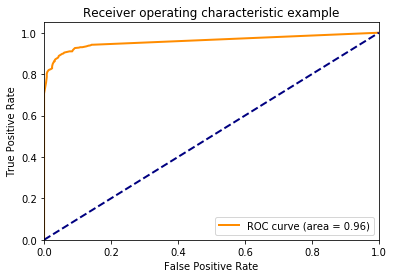

0.9594919999999999

In [15]:
getAUC_PlotfromKNN(result['MvsC_ODC'], result['MvsC_IDM'])

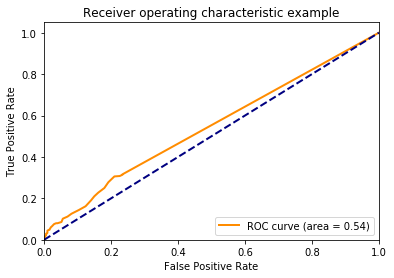

0.544088

In [16]:
getAUC_PlotfromKNN(result['MvsC_ODM'], result['MvsC_IDC'])

In [56]:
result['MvsC_IDC']

,arr_KNN_max_class_label,arr_KNN_from_same_class_ratio,predicted_label,predicted_prob,KNN_score
0,9,0.34,3,0.998380,0.00
1,1,0.28,8,0.999866,0.00
2,9,0.44,8,0.999801,0.00
3,3,0.26,0,0.999574,0.00
4,6,0.36,6,0.999851,0.36
5,2,0.24,6,0.999952,0.00
6,7,0.32,1,0.999344,0.00
7,3,0.24,6,0.999454,0.00
8,4,0.30,3,0.999920,0.00
9,9,0.28,1,0.998949,0.00


In [48]:
IDtest = compare_representations_fast(50,C_representation['CIFAR_test'][:500], C_representation['CIFAR_train'], C_y_train)

In [49]:
IDtest[1]

array([Counter({9: 17, 5: 7, 4: 6, 1: 5, 3: 5, 7: 4, 6: 3, 0: 2, 2: 1}),
       Counter({1: 14, 8: 9, 5: 8, 3: 6, 0: 5, 2: 3, 9: 2, 7: 2, 4: 1}),
       Counter({9: 22, 8: 11, 0: 6, 7: 4, 1: 3, 3: 2, 5: 1, 4: 1}),
       Counter({3: 13, 5: 8, 7: 7, 0: 7, 2: 6, 4: 5, 8: 2, 9: 2}),
       Counter({6: 18, 8: 15, 4: 6, 3: 4, 7: 3, 5: 2, 2: 2}),
       Counter({2: 12, 4: 11, 6: 7, 3: 7, 5: 6, 7: 5, 0: 1, 8: 1}),
       Counter({7: 16, 3: 10, 2: 7, 5: 5, 9: 4, 1: 3, 0: 3, 4: 1, 6: 1}),
       Counter({3: 12, 6: 10, 2: 9, 5: 8, 0: 5, 4: 3, 7: 1, 1: 1, 8: 1}),
       Counter({4: 15, 2: 10, 6: 9, 5: 5, 0: 4, 3: 4, 8: 3}),
       Counter({9: 14, 3: 9, 0: 7, 5: 4, 7: 4, 2: 4, 4: 3, 1: 2, 8: 2, 6: 1}),
       Counter({5: 10, 0: 9, 8: 7, 3: 7, 4: 7, 2: 6, 6: 3, 7: 1}),
       Counter({9: 19, 3: 12, 1: 5, 5: 4, 0: 3, 4: 2, 8: 2, 7: 1, 2: 1, 6: 1}),
       Counter({7: 11, 4: 10, 3: 8, 2: 7, 6: 5, 5: 3, 9: 2, 0: 2, 1: 2}),
       Counter({5: 12, 7: 10, 1: 7, 3: 7, 9: 5, 4: 3, 0: 3, 2: 2, 6: 1}),
     

In [50]:
ODtest = compare_representations_fast(50,C_representation['MNIST_train'][:500], C_representation['CIFAR_train'], C_y_train)

In [51]:
ODtest[1]

array([Counter({9: 10, 2: 8, 3: 7, 5: 6, 0: 6, 7: 5, 1: 3, 4: 3, 8: 2}),
       Counter({1: 26, 9: 9, 5: 4, 3: 4, 8: 2, 4: 1, 6: 1, 0: 1, 2: 1, 7: 1}),
       Counter({0: 28, 9: 7, 8: 6, 5: 4, 2: 2, 6: 1, 1: 1, 3: 1}),
       Counter({9: 13, 5: 8, 3: 7, 0: 6, 8: 5, 2: 4, 7: 3, 4: 2, 6: 2}),
       Counter({9: 11, 5: 8, 3: 8, 0: 6, 2: 5, 7: 4, 1: 3, 8: 3, 6: 2}),
       Counter({9: 20, 3: 7, 0: 5, 5: 5, 1: 5, 8: 3, 7: 2, 4: 2, 2: 1}),
       Counter({9: 9, 2: 9, 3: 8, 4: 5, 0: 5, 5: 4, 7: 4, 8: 3, 6: 3}),
       Counter({9: 15, 5: 10, 3: 7, 7: 7, 0: 6, 2: 2, 4: 2, 1: 1}),
       Counter({9: 15, 0: 6, 5: 6, 8: 6, 3: 6, 2: 5, 4: 3, 7: 2, 6: 1}),
       Counter({9: 27, 3: 7, 0: 5, 5: 4, 2: 2, 1: 2, 4: 2, 8: 1}),
       Counter({7: 10, 3: 10, 2: 9, 9: 8, 5: 5, 4: 3, 0: 2, 1: 2, 6: 1}),
       Counter({9: 13, 5: 13, 3: 7, 0: 4, 1: 4, 2: 4, 7: 3, 8: 1, 4: 1}),
       Counter({9: 14, 5: 10, 1: 9, 7: 9, 3: 3, 2: 3, 4: 1, 6: 1}),
       Counter({5: 20, 3: 10, 9: 6, 0: 5, 1: 4, 7: 3, 2: 1, 8: 1})

In [52]:
def findProbDiffinCountDict(DICT):
    v = list(DICT.values())
    v.sort(reverse = True)
    return v[0] - v[1]
diffID = []
for i in range(len(IDtest[1])):
    diffID.append(findProbDiffinCountDict(IDtest[1][i]))
diffID = np.array(diffID)

IDMaxCount = []
for i in range(len(IDtest[1])):
    IDMaxCount.append(max(list(IDtest[1][i].values())))
IDMaxCount = np.array(IDMaxCount)


In [53]:
ODMaxCount = []
for i in range(len(ODtest[1])):
    ODMaxCount.append(max(list(ODtest[1][i].values())))
ODMaxCount = np.array(ODMaxCount)

(array([ 70., 196., 117.,  50.,  22.,  21.,   7.,   6.,   4.,   7.]),
 array([ 7. , 10.9, 14.8, 18.7, 22.6, 26.5, 30.4, 34.3, 38.2, 42.1, 46. ]),
 <a list of 10 Patch objects>)

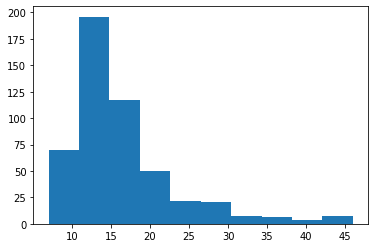

In [54]:
plt.hist(IDMaxCount)

(array([103., 180., 115.,  43.,  29.,  14.,   8.,   2.,   3.,   3.]),
 array([ 8. , 11.8, 15.6, 19.4, 23.2, 27. , 30.8, 34.6, 38.4, 42.2, 46. ]),
 <a list of 10 Patch objects>)

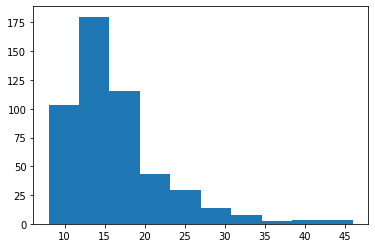

In [55]:
plt.hist(ODMaxCount)

In [18]:
# FM vs M
tmp = compare_representations_fast(50,M_representation_M_FM['FM_train'][:500], M_representation_M_FM['MNIST_train'], M_train_y)
#consistency_of_df(concact_results(C_x_train, tmp[2], tmp[3], M_VGG_Model3),0.7,0.4)
result['MvsFM_ODFM'] = concact_results(fm_train_RGB_x, tmp[2], tmp[3], M_VGG_Model3)
tmp = compare_representations_fast(50,FM_representation_M_FM['MNIST_train'][:500], FM_representation_M_FM['FM_train'], fm_train_y)
#consistency_of_df(concact_results(mnist_train_RGB_x, tmp[2], tmp[3], C_VGG_Model3),0.7,0.4)
result['MvsFM_ODM'] = concact_results(mnist_train_RGB_x, tmp[2], tmp[3], FM_VGG_Model3)
tmp = compare_representations_fast(50,M_representation_M_FM['MNIST_test'][:500], M_representation_M_FM['MNIST_train'], M_train_y)
result['MvsFM_IDM'] = concact_results(mnist_test_RGB_x, tmp[2], tmp[3], M_VGG_Model3)
tmp = compare_representations_fast(50,FM_representation_M_FM['FM_test'][:500], FM_representation_M_FM['FM_train'], fm_train_y)
result['MvsFM_IDFM'] = concact_results(fm_test_RGB_x, tmp[2], tmp[3], FM_VGG_Model3)

In [19]:
result['MvsFM_ODFM'] = getScore_df(result['MvsFM_ODFM'])
result['MvsFM_IDM'] = getScore_df(result['MvsFM_IDM'])

result['MvsFM_ODM'] = getScore_df(result['MvsFM_ODM'])
result['MvsFM_IDFM'] = getScore_df(result['MvsFM_IDFM'])

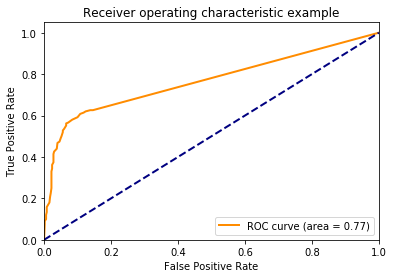

0.7661800000000001

In [20]:
getAUC_PlotfromKNN(result['MvsFM_ODM'], result['MvsFM_IDFM'])

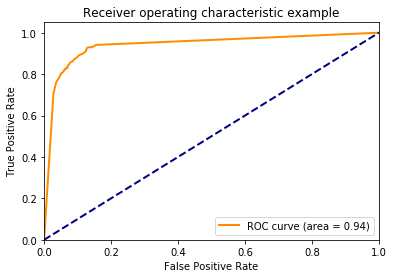

0.939368

In [21]:
getAUC_PlotfromKNN(result['MvsFM_ODFM'], result['MvsFM_IDM'])

In [37]:
def getAUC_PlotfromModelPred(model,ID_x,OD_x):
    from sklearn.metrics import roc_curve, auc
    IDPred = model.predict(ID_x)
    ODPred = model.predict(OD_x)
    IDPredMaxProb = np.max(IDPred, axis = 1)
    ODPredMaxProb = np.max(ODPred, axis = 1)
    y = np.array([0]*len(OD_x) + [1]*len(ID_x))
    scoreMaxPred = np.array(list(ODPredMaxProb) + list(IDPredMaxProb))
    
    fpr, tpr, _ = roc_curve(y, scoreMaxPred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

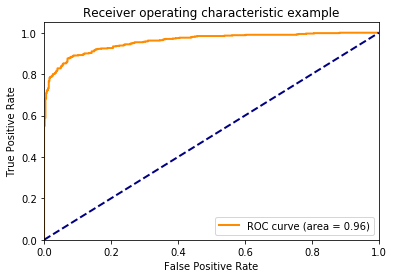

0.9585980000000001

In [39]:
getAUC_PlotfromModelPred(M_VGG_Model3, mnist_train_RGB_x[:500], C_x_train[:500])

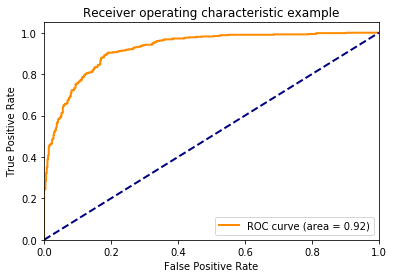

0.9232300000000001

In [40]:
getAUC_PlotfromModelPred(C_VGG_Model3, C_x_train[:500], mnist_train_RGB_x[:500])

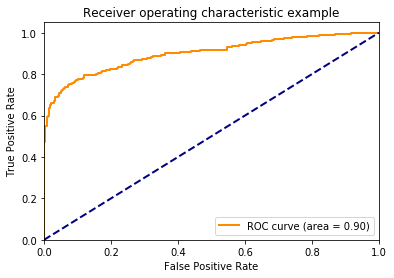

0.899732

In [41]:
getAUC_PlotfromModelPred(FM_VGG_Model3, fm_test_RGB_x[:500], mnist_train_RGB_x[:500])

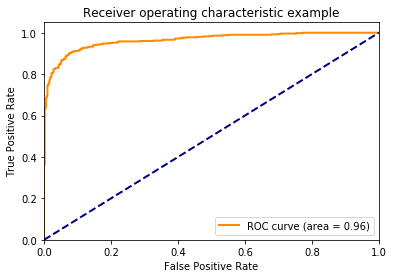

0.964232

In [42]:
getAUC_PlotfromModelPred(M_VGG_Model3, mnist_test_RGB_x[:500], fm_train_RGB_x[:500])

In [60]:
np.max(C_VGG_Model3.predict(mnist_train_RGB_x),axis = 1)

array([0.9870918 , 0.76608664, 0.9997042 , ..., 0.9735091 , 0.92513174,
       0.9159966 ], dtype=float32)

In [59]:
np.max(C_VGG_Model3.predict(C_x_test),axis = 1)

array([0.9983796 , 0.9998659 , 0.99980074, ..., 0.99965155, 0.9998547 ,
       0.9998318 ], dtype=float32)